In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os

In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [4]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [6]:
train_dir = os.path.join('F:/images/train')
validation_dir = os.path.join('F:/images/validation')

['0.jpg', '1.jpg', '10.jpg', '10002.jpg', '10016.jpg', '10037.jpg', '10038.jpg', '10057.jpg', '10063.jpg', '10069.jpg']
(48, 48)


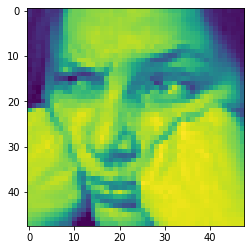

In [7]:
print(os.listdir(os.path.join(train_dir,'angry'))[:10])
img = mpimg.imread(os.path.join(train_dir,'angry',os.listdir(os.path.join(train_dir,'angry'))[10]))
plt.imshow(img)
print(img.shape)

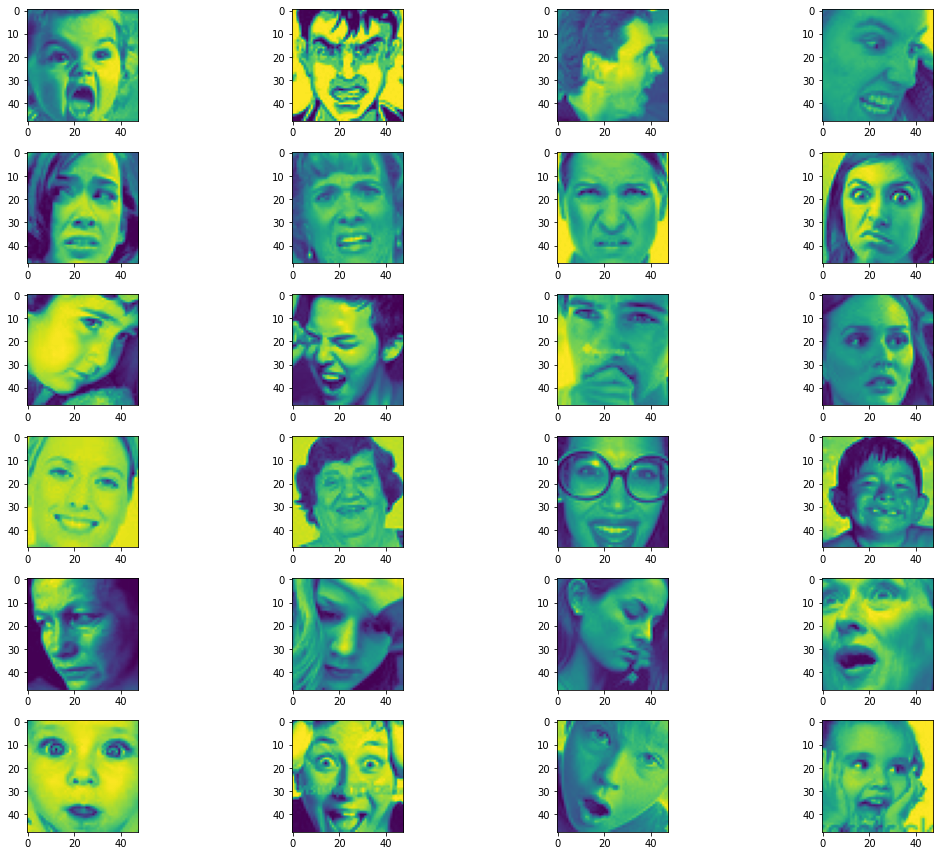

In [8]:
plt.figure(figsize=(16,12))
for i in range(24):
    plt.subplot(6,4,1+i)
    if i<4:
        img = mpimg.imread(os.path.join(train_dir,'angry',os.listdir(os.path.join(train_dir,'angry'))[np.random.choice(200)]))
        plt.imshow(img)
    elif i<8:
        img = mpimg.imread(os.path.join(train_dir,'disgust',os.listdir(os.path.join(train_dir,'disgust'))[np.random.choice(200)]))
        plt.imshow(img)
    elif i<12:
        img = mpimg.imread(os.path.join(train_dir,'fear',os.listdir(os.path.join(train_dir,'fear'))[np.random.choice(200)]))
        plt.imshow(img)
    elif i<16:
        img = mpimg.imread(os.path.join(train_dir,'happy',os.listdir(os.path.join(train_dir,'happy'))[np.random.choice(200)]))
        plt.imshow(img)
    elif i<20:
        img = mpimg.imread(os.path.join(train_dir,'sad',os.listdir(os.path.join(train_dir,'sad'))[np.random.choice(200)]))
        plt.imshow(img)
    elif i<24:
        img = mpimg.imread(os.path.join(train_dir,'surprise',os.listdir(os.path.join(train_dir,'surprise'))[np.random.choice(200)]))
        plt.imshow(img)
plt.tight_layout()
plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(48,48),
                                                    color_mode='grayscale',
                                                    batch_size=128,
                                                    class_mode="categorical")

Found 28821 images belonging to 7 classes.


In [10]:
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),input_shape=(48,48,1),padding='same',activation='relu'),
                                    
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.BatchNormalization(),
                                   
                                    
                                    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                                    
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.BatchNormalization(),
                                    
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(256,activation='relu'),
                                    tf.keras.layers.Dense(7,activation='softmax')])

model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 128)       0

In [12]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(48,48),
                                                    batch_size=128,
                                                    color_mode='grayscale',
                                                    class_mode="categorical")

Found 7066 images belonging to 7 classes.


In [13]:
history = model.fit(train_generator,
                    steps_per_epoch = int(np.floor(28821/128)),
                    epochs=30,
                    validation_data = validation_generator,
                    validation_steps = int(np.floor(7066/128)),
                    verbose=1)

Epoch 1/30
225/225 [==============================] - 1479s 7s/step - loss: 1.8100 - accuracy: 0.3010 - val_loss: 2.0160 - val_accuracy: 0.2582
Epoch 2/30
225/225 [==============================] - 194s 862ms/step - loss: 1.5218 - accuracy: 0.4088 - val_loss: 1.7982 - val_accuracy: 0.3435
Epoch 3/30
225/225 [==============================] - 192s 851ms/step - loss: 1.3954 - accuracy: 0.4598 - val_loss: 1.5166 - val_accuracy: 0.4331
Epoch 4/30
225/225 [==============================] - 232s 1s/step - loss: 1.3137 - accuracy: 0.5006 - val_loss: 1.2443 - val_accuracy: 0.5339
Epoch 5/30
225/225 [==============================] - 255s 1s/step - loss: 1.2529 - accuracy: 0.5212 - val_loss: 1.2158 - val_accuracy: 0.5413
Epoch 6/30
225/225 [==============================] - 209s 932ms/step - loss: 1.2059 - accuracy: 0.5392 - val_loss: 1.1826 - val_accuracy: 0.5526
Epoch 7/30
225/225 [==============================] - 218s 969ms/step - loss: 1.1684 - accuracy: 0.5570 - val_loss: 1.2208 - val_acc

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

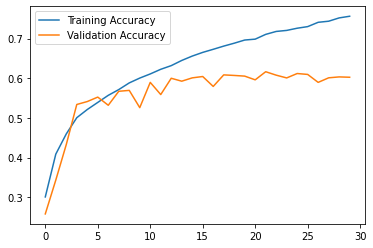

In [15]:
plt.plot(np.arange(30),acc,label='Training Accuracy')
plt.plot(np.arange(30),val_acc,label='Validation Accuracy')
plt.legend()

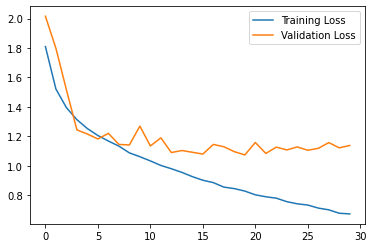

In [16]:
plt.plot(np.arange(30),loss,label='Training Loss')
plt.plot(np.arange(30),val_loss,label='Validation Loss')
plt.legend()